In [1]:
import os
import qutip
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

%matplotlib ipympl

In [2]:
font = {
        'weight' : 'bold',
        'size'   : 20}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font)

In [3]:
# Physical parameters
tau = 15 # total time evolution
Jhope = 1 # Energy hopping
g_0 = 0
npart = 60

alpha_gvars = (4*np.sqrt(2)*Jhope*(np.sin(np.pi/npart))**2)**(-1)
beta_gvars = np.cos(np.pi/npart)
gamma_gvars = np.sin(np.pi/npart)
gvars = {'alpha': alpha_gvars, 'beta': beta_gvars, 'gamma': gamma_gvars, 'tau': tau}

gvars_lin = {'gc': 1, 'tau': tau}

temperature = 0.1 # Changes p_0
t_0 = 0
t_f = tau

# Formatting parameters
amt_times = 200 # How many points we calculate

ts = np.linspace(t_0, t_f, amt_times)

In [4]:
def g_t(t: float, gvars: dict):
  # Minimal action solution
  return gvars['beta'] + gvars['gamma'] * np.tan((1-t/gvars['tau']) * np.arctan((g_0 - gvars['beta'])/gvars['gamma'])
                                                 - t/gvars['tau'] * np.arctan((g_0 + gvars['beta'] - 2)/gvars['gamma']) )

In [5]:
def g_lin_t(t: float, gvars: dict):
    # Linear ramp solution
    return g_0 + 2 * (gvars['gc'] - g_0) * t / gvars['tau']

In [6]:
def H_k_func(k):
  Hstatic = 2* Jhope * (np.sin(k) * qutip.sigmay() - np.cos(k) * qutip.sigmaz())
  Hdinamic = 2 * qutip.sigmaz()
  H_k = [Hstatic, [Hdinamic, g_t]]
  return H_k

def H_k_lin_func(k):
  Hstatic = 2* Jhope * ( np.sin(k) * qutip.sigmay() - np.cos(k) * qutip.sigmaz() )
  Hdinamic = 2 * qutip.sigmaz()
  H_k = [Hstatic, [Hdinamic, g_lin_t]]
  return H_k

def H_k_t(t:float, k:float, gvars: dict):
  Hstatic = 2* Jhope * ( np.sin(k) * qutip.sigmay() - np.cos(k) * qutip.sigmaz() )
  Hdinamic = 2 * qutip.sigmaz()
  return Hstatic + Hdinamic * g_t(t, gvars)

def H_k_lin_t(t:float, k:float, gvars: dict):
  Hstatic = 2* Jhope * ( np.sin(k) * qutip.sigmay() - np.cos(k) * qutip.sigmaz())
  Hdinamic = 2 * qutip.sigmaz()
  return Hstatic + Hdinamic * g_lin_t(t, gvars)

## Energy levels

In [7]:
gs_dyn = []
es_dyn = []
gap_dyn = []

gs_lin_dyn = []
es_lin_dyn = []
gap_lin_dyn = []

for t in ts:
    en_gs = 0
    en_gs_lin = 0

    for l in range(1, int(npart/2)+1):
        k = (2*l-1)*np.pi/npart

        energies = H_k_t(t,k,gvars).eigenenergies()
        energies_lin = H_k_lin_t(t,k,gvars_lin).eigenenergies()

        en_gs += energies[0]
        en_gs_lin += energies[0]

        if l==1:
            en_gap = energies[1]
            en_gap_lin = energies_lin[1]

    gs_dyn += [en_gs]
    gap_dyn += [en_gap]
    es_dyn += [en_gs + 2*en_gap]

    gs_lin_dyn += [en_gs_lin]
    gap_lin_dyn += [en_gap_lin]
    es_lin_dyn += [en_gs_lin + 2*en_gap_lin]

/tmp/ipykernel_14322/1490305116.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig1, ax1 = plt.subplots()


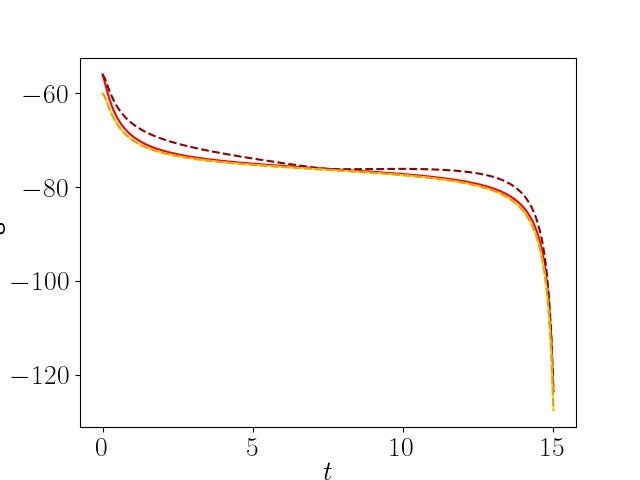

In [33]:
fig1, ax1 = plt.subplots()
ax1.scatter([],[],color='red',label="Excited state:")
ax1.plot(ts, es_dyn, color="red", label="Minimal action")
ax1.plot(ts, es_lin_dyn, color="darkred", label="Linear ramp", linestyle="dashed")

ax1.scatter([],[],alpha=0.0,label=' ')

ax1.scatter([],[],color='gold',label="Ground state:")
ax1.plot(ts, gs_dyn, color="gold", label="Minimal action")
ax1.plot(ts, gs_lin_dyn, color="goldenrod", label="Linear ramp", linestyle="dashed")

#ax1.legend()
ax1.set_xlabel('$t$', labelpad=-0.5)
ax1.set_ylabel('Energia')

title1 = "Energy levels, $ N={} $, ".format(int(npart)) + "$ \\tau={} $".format(int(tau))
#ax1.set_title(title1)

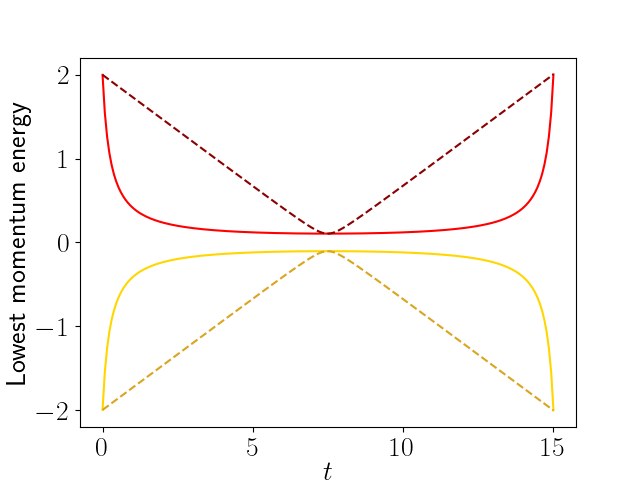

In [35]:
gap_dyn_gs = [-i for i in gap_dyn]
gap_lin_dyn_gs = [-i for i in gap_lin_dyn]

fig2, ax2 = plt.subplots()

scatter21 = ax2.scatter([],[],color='red',label="Excited state")
line21, = ax2.plot(ts, gap_dyn, color="red", label="Minimal action")
line22, = ax2.plot(ts, gap_lin_dyn, color="darkred", label="Linear ramp", linestyle="dashed")

#ax2.scatter([],[],alpha=0.0,label=' ')

scatter22 = ax2.scatter([],[],color='gold',label="Ground state")
line23, = ax2.plot(ts, gap_dyn_gs, color="gold", label="Minimal action")
line24, = ax2.plot(ts, gap_lin_dyn_gs, color="goldenrod", label="Linear ramp", linestyle="dashed")

#legend1 = ax2.legend(handles=[scatter21, line21, line22], loc='upper center')
#ax2.add_artist(legend1)

#legend2 = ax2.legend(handles=[scatter22, line23, line24], loc='lower center')

ax2.set_xlabel('$t$', labelpad=-0.5)
ax2.set_ylabel('Lowest momentum energy')

title2 = "Lowest momentum energy levels, $ N={} $, ".format(int(npart)) + "$ \\tau={} $".format(int(tau))
#ax2.set_title(title2)

## Work distribution

In [10]:
interval_colunas = 10 # Int interval between columns shown in work distr

beta=1/temperature
n_beta = 1/(np.exp(-beta)-1)
rho_0 = qutip.thermal_dm(2, n_beta)

### Minimal Action

In [11]:
evol_total = qutip.propagator(H_k_func(np.pi/npart), ts,[],args=gvars)

/usr/lib/python3/dist-packages/mpl_toolkits/mplot3d/axes3d.py:2380: ComplexWarning: Casting complex values to real discards the imaginary part
  polys[..., i] = p + dp * cuboid[..., i]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


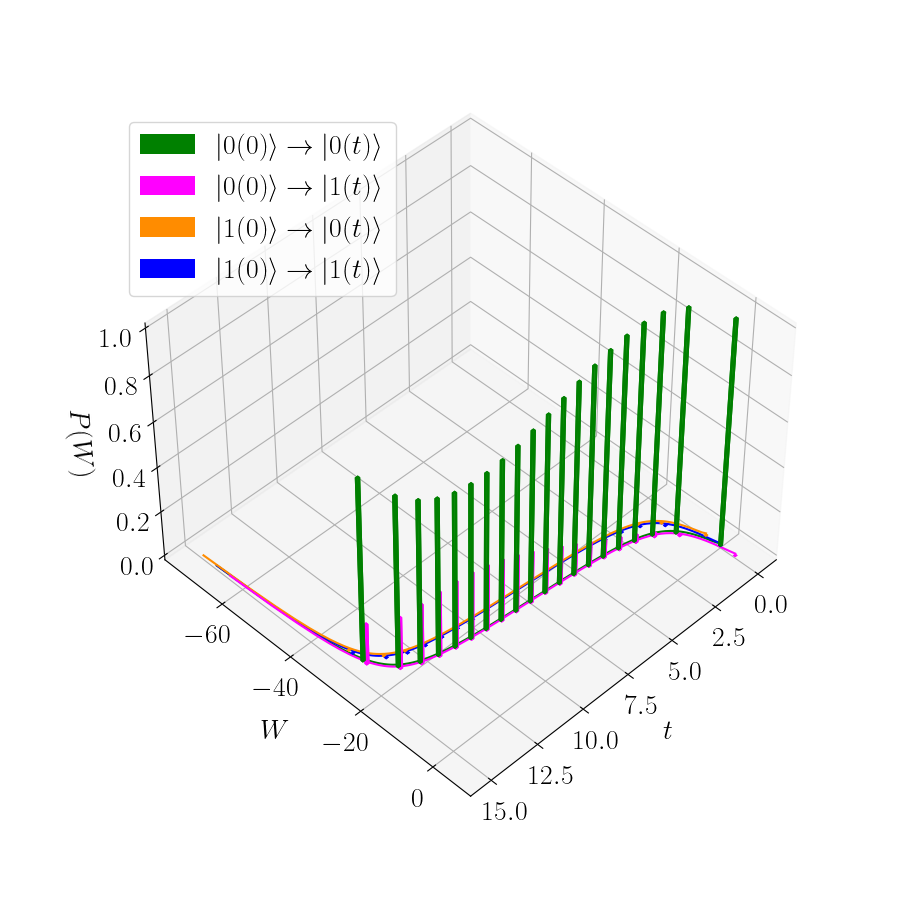

In [38]:
def p_n_m(t):
  ###return [p_00, p_01, p_10, p_11]
  conjaux_0 = np.array(H_k_t(0,np.pi/npart,gvars).eigenstates()[1])
  conjaux_t = np.array(H_k_t(t,np.pi/npart,gvars).eigenstates()[1])
  varaux = []
  for i in conjaux_t:
    for j in conjaux_0:
      varaux += [np.linalg.norm(np.linalg.multi_dot([i.dag().full(), evol_total[int(t * amt_times / tau)], j.full()]))**2]
  return varaux

points_00 = []
points_01 = []
points_10 = []
points_11 = []

for t in np.linspace(t_0, t_f - tau/amt_times, amt_times):
  #points = [energy_coord, prob]
  p0_gs = rho_0[1][0][1]
  p0_es = rho_0[0][0][0]
  p_nm = p_n_m(t)

  points_00 += [[(gs_dyn[int(t * amt_times / tau)]-gs_dyn[0]), p0_gs*p_nm[0]]]
  points_01 += [[(es_dyn[int(t * amt_times / tau)]-gs_dyn[0]), p0_gs*p_nm[1]]]
  points_10 += [[(gs_dyn[int(t * amt_times / tau)]-es_dyn[0]), p0_es*p_nm[0]]]
  points_11 += [[(es_dyn[int(t * amt_times / tau)]-es_dyn[0]), p0_es*p_nm[1]]]

fig3 = plt.figure(figsize=(9,9))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.set_box_aspect(aspect=None, zoom=1.0)

# Adding points
width1 = tau/100
depth1 = int(max(gs_dyn)-min(gs_dyn))/100

for i in range(0, amt_times, interval_colunas):
    ax3.bar3d(ts[i], points_00[i][0], 0, width1, depth1, points_00[i][1], color='green', shade=False)
    ax3.bar3d(ts[i], points_01[i][0], 0, width1, depth1, points_01[i][1], color='fuchsia', shade=False)
    ax3.bar3d(ts[i], points_10[i][0], 0, width1, depth1, points_10[i][1], color='darkorange', shade=False)
    ax3.bar3d(ts[i], points_11[i][0], 0, width1, depth1, points_11[i][1], color='blue', shade=False)
    
# Axes label
ax3.set_xlabel('$t$',labelpad=12.0)
ax3.set_ylabel('$W$',labelpad=12.0)
ax3.set_zlim(0, 1)
ax3.set_zlabel('$P(W)$',labelpad=10.0)

title3 = "Minimal Action work distribution, $ N={} $, ".format(int(npart)) + "$ \\tau={} $".format(int(tau))
#ax3.set_title(title3)

# Legend
legend_elements = [Patch(facecolor='green', label='$ |0(0) \\rangle \\rightarrow |0(t) \\rangle $'),
                   Patch(facecolor='fuchsia', label='$ |0(0) \\rangle \\rightarrow |1(t) \\rangle $'),
                   Patch(facecolor='darkorange', label='$ |1(0) \\rangle \\rightarrow |0(t) \\rangle $'),
                   Patch(facecolor='blue', label='$ |1(0) \\rangle \\rightarrow |1(t) \\rangle $')]
ax3.legend(handles=legend_elements, loc='upper left')

ax3.plot(ts, (gs_dyn-gs_dyn[0]), zs=0, zdir='z', color='green')
ax3.plot(ts, (es_dyn-es_dyn[0]), zs=0, zdir='z', color='blue')
ax3.plot(ts, (gs_dyn-es_dyn[0]), zs=0, zdir='z', color='darkorange')
ax3.plot(ts, (es_dyn-gs_dyn[0]), zs=0, zdir='z', color='fuchsia')

ax3.view_init(45, 45) # View angle

/usr/lib/python3/dist-packages/mpl_toolkits/mplot3d/axes3d.py:2380: ComplexWarning: Casting complex values to real discards the imaginary part
  polys[..., i] = p + dp * cuboid[..., i]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


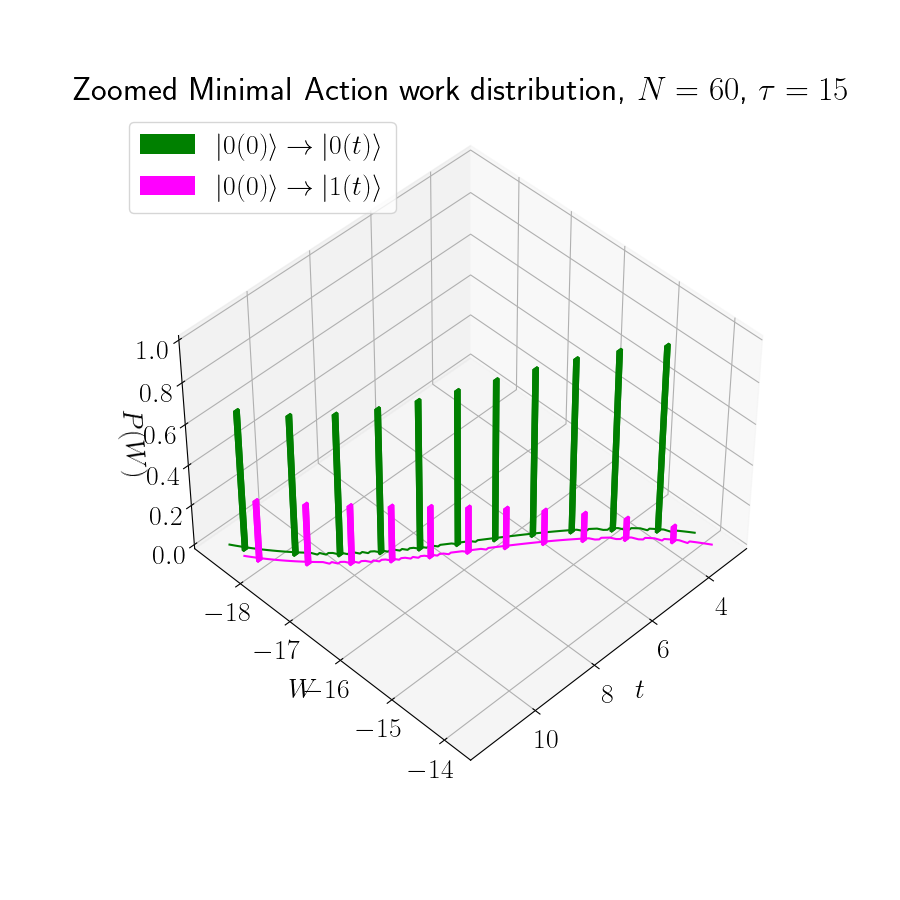

In [13]:
fig8 = plt.figure(figsize=(9,9))
ax8 = fig8.add_subplot(111, projection='3d')
ax8.set_box_aspect(aspect=None, zoom=0.9)

avg = (points_00[int(amt_times/2)][0]+points_01[int(amt_times/2)][0])/2
margin = abs(points_01[int(amt_times/2)][0]-points_00[int(amt_times/2)][0]) * 10
lim_inf =  avg + margin
lim_sup = avg - margin

# Adding points
width12 = tau/100
depth12 = int(abs(lim_sup - lim_inf))/100

for i in range(0, amt_times, interval_colunas):
    if (points_00[i][0] > lim_inf) or (points_01[i][0] < lim_sup):
      pass
    else:
      ax8.bar3d(ts[i], points_00[i][0], 0, width12, depth12, points_00[i][1], color='green', shade=False)
      ax8.bar3d(ts[i], points_01[i][0], 0, width12, depth12, points_01[i][1], color='fuchsia', shade=False)
    
# Axes label
ax8.set_xlabel('$t$')
ax8.set_ylabel('$W$')
ax8.set_zlim(0, 1)
ax8.set_zlabel('$P(W)$')

title32 = " Zoomed Minimal Action work distribution, $ N={} $, ".format(int(npart)) + "$ \\tau={} $".format(int(tau))
ax8.set_title(title32)

# Legend
legend_elements = [Patch(facecolor='green', label='$ |0(0) \\rangle \\rightarrow |0(t) \\rangle $'),
                   Patch(facecolor='fuchsia', label='$ |0(0) \\rangle \\rightarrow |1(t) \\rangle $')]
ax8.legend(handles=legend_elements, loc='upper left')

coord_00 = []
coord_01 = []
t1_zoom = []

for i in range(amt_times):
  if (points_00[i][0] > lim_inf) or (points_01[i][0] < lim_sup):
      pass
  else:
     coord_00 += [points_00[i][0]]
     coord_01 += [points_01[i][0]]
     t1_zoom += [ts[i]]

ax8.plot(t1_zoom, coord_00, zs=0, zdir='z', color='green')
ax8.plot(t1_zoom, coord_01, zs=0, zdir='z', color='fuchsia')

ax8.view_init(45, 45) # View angle

### Linear ramp

In [14]:
evol_total_lin = qutip.propagator(H_k_lin_func(np.pi/npart), ts,[],args=gvars_lin)

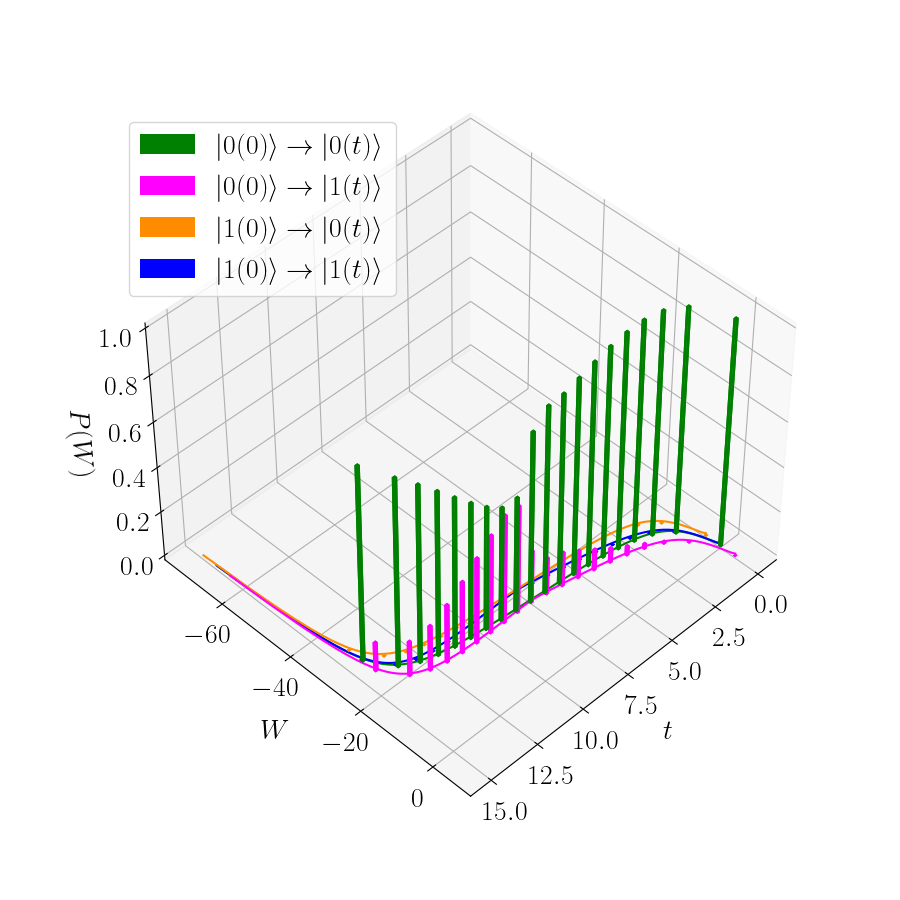

In [39]:
def p_n_m_lin(t):
  ###return [p_00, p_01, p_10, p_11]
  conjaux_0 = np.array(H_k_lin_t(0,np.pi/npart,gvars_lin).eigenstates()[1])
  conjaux_t = np.array(H_k_lin_t(t,np.pi/npart,gvars_lin).eigenstates()[1])
  varaux = []
  for i in conjaux_t:
    for j in conjaux_0:
      varaux += [np.linalg.norm(np.linalg.multi_dot([i.dag().full(), evol_total[int(t * amt_times / tau)], j.full()]))**2]
  return varaux

pointslin_00 = []
pointslin_01 = []
pointslin_10 = []
pointslin_11 = []

for t in np.linspace(t_0, t_f - tau/amt_times, amt_times):
  #points = [energy_coord, prob]
  p0_gs = rho_0[1][0][1]
  p0_es = rho_0[0][0][0]
  p_nm = p_n_m_lin(t)

  pointslin_00 += [[gs_lin_dyn[int(t * amt_times / tau)]-gs_lin_dyn[0], p0_gs*p_nm[0]]]
  pointslin_01 += [[es_lin_dyn[int(t * amt_times / tau)]-gs_lin_dyn[0], p0_gs*p_nm[1]]]
  pointslin_10 += [[gs_lin_dyn[int(t * amt_times / tau)]-es_lin_dyn[0], p0_es*p_nm[0]]]
  pointslin_11 += [[es_lin_dyn[int(t * amt_times / tau)]-es_lin_dyn[0], p0_es*p_nm[1]]]

fig4 = plt.figure(figsize=(9,9))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.set_box_aspect(aspect=None, zoom=1.0)

# Adding points
width2 = tau/100
depth2 = int(abs(max(gs_lin_dyn)-min(gs_lin_dyn)))/100

for i in range(0, amt_times, interval_colunas):
    ax4.bar3d(ts[i], pointslin_00[i][0], 0, width2, depth2, pointslin_00[i][1], color='green', shade=False)
    ax4.bar3d(ts[i], pointslin_01[i][0], 0, width2, depth2, pointslin_01[i][1], color='fuchsia', shade=False)
    ax4.bar3d(ts[i], pointslin_10[i][0], 0, width2, depth2, pointslin_10[i][1], color='darkorange', shade=False)
    ax4.bar3d(ts[i], pointslin_11[i][0], 0, width2, depth2, pointslin_11[i][1], color='blue', shade=False)
    
# Axes label
ax4.set_xlabel('$t$',labelpad=12.0)
ax4.set_ylabel('$W$',labelpad=12.0)
ax4.set_zlim(0, 1)
ax4.set_zlabel('$P(W)$',labelpad=10.0)

title4 = "Linear ramp work distribution, $ N={} $, ".format(int(npart)) + "$ \\tau={} $".format(int(tau))
#ax4.set_title(title4)

# Legend
legend_elements = [Patch(facecolor='green', label='$ |0(0) \\rangle \\rightarrow |0(t) \\rangle $'),
                   Patch(facecolor='fuchsia', label='$ |0(0) \\rangle \\rightarrow |1(t) \\rangle $'),
                   Patch(facecolor='darkorange', label='$ |1(0) \\rangle \\rightarrow |0(t) \\rangle $'),
                   Patch(facecolor='blue', label='$ |1(0) \\rangle \\rightarrow |1(t) \\rangle $')]
ax4.legend(handles=legend_elements, loc='upper left')

ax4.plot(ts, (gs_lin_dyn-gs_lin_dyn[0]), zs=0, zdir='z', color='green')
ax4.plot(ts, (es_lin_dyn-es_lin_dyn[0]), zs=0, zdir='z', color='blue')
ax4.plot(ts, (gs_lin_dyn-es_lin_dyn[0]), zs=0, zdir='z', color='darkorange')
ax4.plot(ts, (es_lin_dyn-gs_lin_dyn[0]), zs=0, zdir='z', color='fuchsia')

ax4.view_init(45, 45) # View angle

/usr/lib/python3/dist-packages/mpl_toolkits/mplot3d/axes3d.py:2380: ComplexWarning: Casting complex values to real discards the imaginary part
  polys[..., i] = p + dp * cuboid[..., i]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


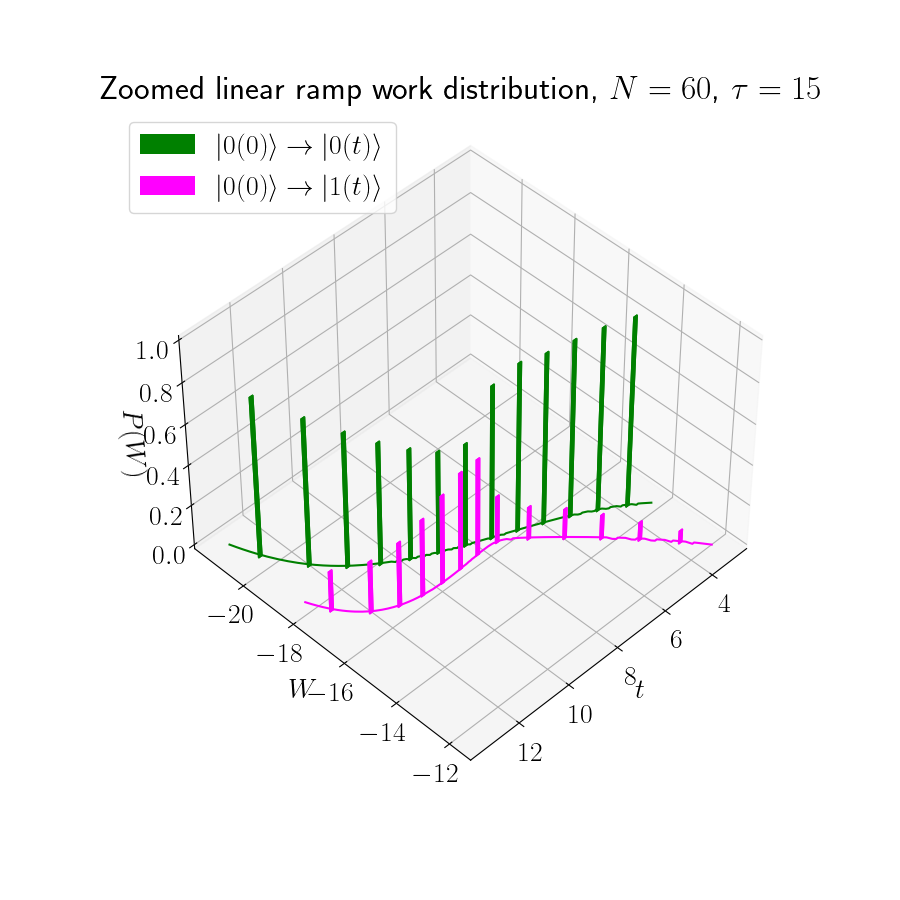

In [16]:
fig9 = plt.figure(figsize=(9,9))
ax9 = fig9.add_subplot(111, projection='3d')
ax9.set_box_aspect(aspect=None, zoom=0.9)

avglin = (pointslin_00[int(amt_times/2)][0]+pointslin_01[int(amt_times/2)][0])/2
marginlin = abs(pointslin_01[int(amt_times/2)][0]-pointslin_00[int(amt_times/2)][0]) * 10
lim_inf_lin =  avglin + marginlin
lim_sup_lin = avglin - marginlin

# Adding points
width22 = tau/100
depth22 = int(abs(lim_sup_lin - lim_inf_lin))/100

for i in range(0, amt_times, interval_colunas):
    if (pointslin_00[i][0] > lim_inf_lin) or (pointslin_01[i][0] < lim_sup_lin):
      pass
    else:
      ax9.bar3d(ts[i], pointslin_00[i][0], 0, width22, depth22, pointslin_00[i][1], color='green', shade=False)
      ax9.bar3d(ts[i], pointslin_01[i][0], 0, width22, depth22, pointslin_01[i][1], color='fuchsia', shade=False)
    
# Axes label
ax9.set_xlabel('$t$')
ax9.set_ylabel('$W$')
ax9.set_zlim(0, 1)
ax9.set_zlabel('$P(W)$')

title42 = " Zoomed linear ramp work distribution, $ N={} $, ".format(int(npart)) + "$ \\tau={} $".format(int(tau))
ax9.set_title(title42)

# Legend
legend_elements = [Patch(facecolor='green', label='$ |0(0) \\rangle \\rightarrow |0(t) \\rangle $'),
                   Patch(facecolor='fuchsia', label='$ |0(0) \\rangle \\rightarrow |1(t) \\rangle $')]
ax9.legend(handles=legend_elements, loc='upper left')

coordlin_00 = []
coordlin_01 = []
t2_zoom = []

for i in range(amt_times):
  if (pointslin_00[i][0] > lim_inf_lin) or (pointslin_01[i][0] < lim_sup_lin):
      pass
  else:
     coordlin_00 += [pointslin_00[i][0]]
     coordlin_01 += [pointslin_01[i][0]]
     t2_zoom += [ts[i]]

ax9.plot(t2_zoom, coordlin_00, zs=0, zdir='z', color='green')
ax9.plot(t2_zoom, coordlin_01, zs=0, zdir='z', color='fuchsia')

ax9.view_init(45, 45) # View angle

## Probabilities vs. time

In [17]:
probs_00 = []
probs_01 = []
probs_10 = []
probs_11 = []

probslin_00 = []
probslin_01 = []
probslin_10 = []
probslin_11 = []

for i in range(amt_times):
    probs_00 += [points_00[i][1]]
    probs_01 += [points_01[i][1]]
    probs_10 += [points_10[i][1]]
    probs_11 += [points_11[i][1]]

    probslin_00 += [pointslin_00[i][1]]
    probslin_01 += [pointslin_01[i][1]]
    probslin_10 += [pointslin_10[i][1]]
    probslin_11 += [pointslin_11[i][1]]

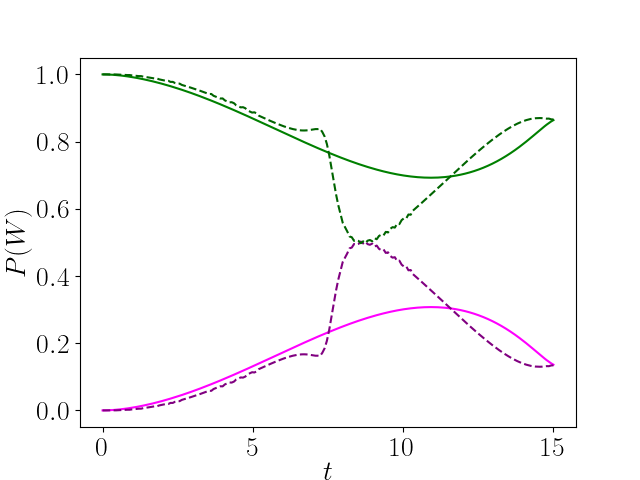

In [41]:
fig5,ax5 = plt.subplots()

# Axes label
ax5.set_xlabel('$t$', labelpad=-0.5)
ax5.set_ylabel('$P(W)$')

ax5.scatter([],[],color='fuchsia',label='$ |0(0) \\rangle \\rightarrow |1(t) \\rangle $')
ax5.plot(ts, probs_01 , color='fuchsia', label='Minimal action')
ax5.plot(ts, probslin_01, color='purple', linestyle='dashed', label='Linear ramp')

ax5.scatter([],[],alpha=0.0,label=' ')

ax5.scatter([],[],color='green',label='$ |0(0) \\rangle \\rightarrow |0(t) \\rangle $')
ax5.plot(ts, probs_00 , color='green', label='Minimal action')
ax5.plot(ts, probslin_00, color='darkgreen', linestyle='dashed', label='Linear ramp')

#ax5.legend()

title5 = "Ground state transition probabilities, $ N={} $, ".format(int(npart)) + "$ \\tau={} $".format(int(tau))
#ax5.set_title(title5)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Excited state transition probabilities, $ N=60 $, $ \\tau=15 $')

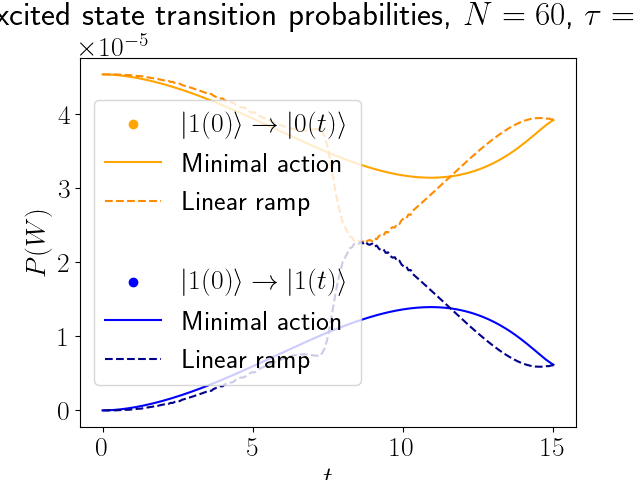

In [19]:
fig6,ax6 = plt.subplots()

# Axes label
ax6.set_xlabel('$t$')
ax6.set_ylabel('$P(W)$')

ax6.scatter([],[],color = 'orange', label='$ |1(0) \\rangle \\rightarrow |0(t) \\rangle $')
ax6.plot(ts, probs_10 , color='orange', label='Minimal action')
ax6.plot(ts, probslin_10, color='darkorange', linestyle='dashed', label='Linear ramp')

ax6.scatter([],[],alpha=0.0,label=' ')

ax6.scatter([],[],color='blue',label='$ |1(0) \\rangle \\rightarrow |1(t) \\rangle$')
ax6.plot(ts, probs_11 , color='blue', label='Minimal action')
ax6.plot(ts, probslin_11, color='darkblue', linestyle='dashed', label='Linear ramp')

ax6.legend()

title6 = "Excited state transition probabilities, $ N={} $, ".format(int(npart)) + "$ \\tau={} $".format(int(tau))
ax6.set_title(title6)

Taking a look at $g(t)/\Delta$:

Text(0.5, 1.0, 'Normalized $ g(t) $, $ N=60 $, $ \\tau=15 $')

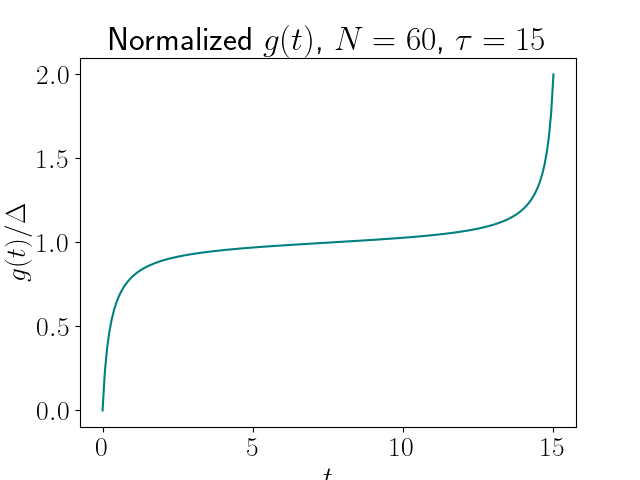

In [20]:
g_values = [g_t(i, gvars)/Jhope for i in ts]

fig7,ax7=plt.subplots()

# Axes label
ax7.set_xlabel('$t$')
ax7.set_ylabel('$g(t)/ \\Delta$')
ax7.plot(ts, g_values, color='teal')

title7 = "Normalized $ g(t) $, $ N={} $, ".format(int(npart)) + "$ \\tau={} $".format(int(tau))
ax7.set_title(title7)

## Saving files

In [21]:
directory_name = "N={}_".format(npart)+"tau={}".format(tau)
os.mkdir(directory_name)
path = "/home/bentinho/Documentos/Programming/TFIM"+directory_name

for i in plt.get_fignums():
    figaux = plt.figure(i)
    figaux.savefig(path + "figure_{}".format(i)+".png")

FileExistsError: [Errno 17] File exists: 'N=60_tau=15'